In [2]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import scipy.linalg as lng
%matplotlib
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import csv


Using matplotlib backend: Qt5Agg


In [4]:
data = pd.read_csv(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module2\Exercises 2\Exercises 2\Python\Prostate.txt', sep=" ",)
Y = np.array(data.lpsa.tolist())

data.drop(['lpsa'], axis=1, inplace=True)

X = np.reshape(np.array(data.values), (len(data), len(data.columns)))
# normalize the data
#data_norm = (data-data.mean())/(data.std()) 

#data_norm_wIntercept = np.c_[np.ones(len(data_norm)), data_norm]

# Question1

0.001 0.45666944804182713
0.005994842503189409 0.45666947617890385
0.03593813663804628 0.45667048095734986
0.21544346900318845 0.456705257949499
1.291549665014884 0.45772058095648716
7.742636826811269 0.4731999644198397
46.41588833612782 0.5586882518951561
278.2559402207126 0.7938173144152408
1668.100537200059 1.019483620756457
10000.0 1.0921825707418475


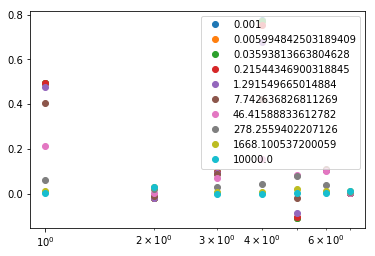

In [5]:
lambda_ = np.logspace(-3, 4, num=10)

plt.figure()

beta_ridge_list1 = list()

for lambda_value in lambda_:
    
    inv = np.linalg.inv(np.dot(X.transpose(),X) + lambda_value*np.identity(len(data.columns)))
    inv_ = np.dot(inv, X.transpose())
    beta_ridge = np.dot(inv_, Y)
    
    beta_ridge_list1.append(beta_ridge)
    
    e = np.mean((np.dot(X, beta_ridge) - Y)**2)
    print(lambda_value, e)
    plt.semilogx(beta_ridge, 'o', label = lambda_value)
    plt.legend()
    
# based on printed values, optimal range for lambda is 10^-3 to 10^3

In [6]:
print(np.shape(X))

(97, 8)


# Question 1(b)

In [7]:
# split into train and test data
K = 10
I = np.arange(0, len(data))
I = I[np.random.permutation(len(data))]

lambda_ = np.logspace(-3,1,num=10)

mse = np.zeros((K, len(lambda_)))

for i in range(1, K+1):
    
    x_train = X[i!=I,:]
    y_train = Y[i!=I]
    x_test = X[i==I]
    y_test = Y[i==I]
    
    
    
    XTrain = preprocessing.scale(x_train)
    YTrain = preprocessing.scale(y_train)
    
    beta_ridge_list = list()
    
    for j, lambda_value in enumerate(lambda_):
    
        inv = np.linalg.inv(np.dot(XTrain.transpose(),XTrain) + lambda_value*np.identity(len(data.columns)))
        inv_ = np.dot(inv, XTrain.transpose())
        beta_ridge = np.dot(inv_, YTrain)
        beta_ridge_list.append(beta_ridge)
        
        mse[i-1,j] = np.mean(y_test-np.matmul(x_test, beta_ridge)**2)

meanMSE = np.mean(mse, axis = 0)
jOpt = np.argsort(meanMSE)[0]
lambda_OP = lambda_[jOpt]
print(lambda_OP)

# Remember excact solution depends on a random indexing, so results may vary
#plt.semilogx([lambda_[jOpt], lambda_[jOpt]], [np.min(beta_ridge_list1), np.max(beta_ridge_list1)], marker = ".")

0.001


# Question 1(c)

In [8]:
seMSE = np.std(mse, axis = 0) / np.sqrt(K)

J = np.where(meanMSE[jOpt] + seMSE[jOpt] > meanMSE)[0]
j = int(J[-1:])
Lambda_CV_1StdRule = lambda_[j]

print(Lambda_CV_1StdRule)

1.2915496650148828


In [9]:
print(np.where(meanMSE[jOpt] + seMSE[jOpt] > meanMSE))
print(j)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),)
7


# Question1(d)

0.6747517944903174
0.5317667494542706 133.89057165182322
0.5317630526257772 133.88876861034635
0.5317527986872732 133.88376010000178
0.5317245187392446 133.86988965864037
0.5316477600565785 133.83180054255843
0.5314486908690901 133.7296280764884
0.530998330636313 133.4727108632167
0.5303909404711742 132.9318109212249
0.5316335809189746 132.26025463153866
0.5421345273686453 132.75336422374656
7 0.5303909404711742
8 132.26025463153866
7 8

3.593813663804626


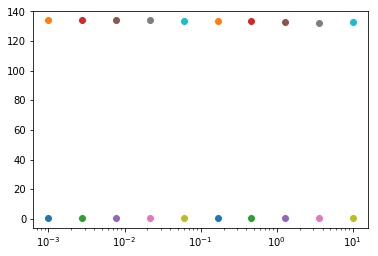

In [11]:
M = np.c_[np.ones(len(data)), data] # Include offset / intercept

# Linear solver
beta, _, rnk, s = lng.lstsq(M, Y)

Y_hat = np.matmul(M, beta)

e = Y - np.matmul(M, beta) # Low bias std
s = np.std(e) # irreducible error

print(s)

AIC_list = list()
BIC_list = list()

for lambda_value in lambda_:
    
    inv = np.linalg.inv(np.matmul(data.transpose(),data) + lambda_value*np.identity(len(data.columns)))
    inv_ = np.matmul(inv, data.transpose())
    beta_ridge = np.matmul(inv_, Y)
    
    d = np.trace(np.matmul(data, inv_))
    
    e = np.mean((np.dot(data, beta_ridge) - Y)**2)
    
    AIC = e + (2*d*(s**2))/(len(data))
    AIC_list.append(AIC)
    BIC = (len(data)/s**2)*(e + (np.log(len(data))*d*s**2)/len(data))
    BIC_list.append(BIC)
    print(AIC, BIC)
    plt.semilogx(lambda_value, AIC, 'o')
    plt.semilogx(lambda_value, BIC, 'o')
    
    
aic_min = np.min(AIC_list)
aic_min_ind = np.argmin(AIC_list)


bic_min = np.min(BIC_list)
bic_min_ind = np.argmin(BIC_list)

print(aic_min_ind, aic_min)
print(bic_min_ind, bic_min)

print(aic_min_ind, bic_min_ind)

print('')
print(lambda_[bic_min_ind])

# Question 1(e)

In [110]:
NBoot = 100

beta_list = list()

beta_ridge = np.zeros((len(data.columns), len(lambda_) , NBoot))

for i in range(0, NBoot):
    I = np.random.randint(0, len(data), len(data))
    
    data_boot = data[i==I]
    y_boot = Y[i==I]
    
    beta_list = list()
    j = -1
    for lambda_value in lambda_:
        j = j + 1
        inv = np.linalg.inv(np.matmul(data_boot.transpose(),data_boot) + lambda_value*np.identity(len(data_boot.columns)))
        inv_ = np.matmul(inv, data_boot.transpose())
        beta_ridge[:,j,i] = np.matmul(inv_, y_boot)
        
beta_std = np.std(beta_ridge, axis=2)
for ind in range(8):
    plt.semilogx(lambda_, beta_std[ind,:], label = ind)
    
plt.legend()
        

In [101]:
np.shape(lambda_)

(10,)

# Question 3

In [310]:
def roc_data(y, y_true, cutoff):
    sensitivity = list()
    specificity = list()
    
    for i, val in enumerate(cutoff):
        num_pos = np.sum(y_true==1)
        num_neg = np.sum(y_true==-1)
        
        true_positive = np.sum(y[y_true==1]>=val)
        true_negative = np.sum(y[y_true==0]<val)
        
        sensitivity.append(true_positive/(true_positive+true_negative))
        specificity.append(true_negative/(true_positive+true_negative))
    
    return np.array(sensitivity), np.array(specificity)

In [316]:
X = np.loadtxt(r'M:\Documents\Courses\Credits\2019August\Module2\Solutions 2\Solutions 2\Python\X_ex2_3.txt', delimiter = ',', skiprows = 1)
y = np.loadtxt(r'M:\Documents\Courses\Credits\2019August\Module2\Solutions 2\Solutions 2\Python\y_ex2_3.txt', delimiter = ' ', skiprows = 1)

n_classes = 2
cutoff = np.linspace(1.0, 0.0, 10)
fpr = dict()
spe = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes): # for 2 classes
    print('i', i)
    tpr[i], spe = roc_data(X[:,i], y, cutoff)
    #print(spe)
    fpr[i] = 1-spe
    
    print(tpr, spe)
    roc_auc[i] = auc(fpr[i], tpr[i])
    

i 0
{0: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])} [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
i 1
{0: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])} [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [317]:
plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=n_classes, label='ROC curve (area = %0.2f)' % roc_auc[1])

In [318]:
print(roc_auc)

{0: 0.0, 1: 0.0}


In [292]:
# Make y 1-hot encoded
n_classes = 2
y_1hot = np.zeros((8, n_classes))
y_1hot[np.arange(8), y_test.astype(int)] = 1    
for i in range(n_classes): # A bit redundant here, as there only is 2 classes
    fpr[i], tpr[i], threshold = roc_curve(y_1hot[:, i], y_score[:, i])
    print (threshold)
    roc_auc[i] = auc(fpr[i], tpr[i])

IndexError: index 3 is out of bounds for axis 1 with size 2

In [290]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.])

In [146]:
cutoff = np.arange(1,10)
sen, spe = roc_data(Y, Y_true['0'].tolist(), cutoff)
sen

KeyError: '0'

In [123]:
plt.plot(Y_true, Y)

In [143]:
a = Y_true.columns

In [144]:
a

Int64Index([0], dtype='int64')

In [15]:
def ridgeMulti(X, _lambda, p, y):
    inner_prod = np.linalg.inv(np.matmul(X.T, X) + _lambda * np.eye(p,p))
    outer_prod = np.matmul(X.T, y)
    betas = np.matmul(inner_prod, outer_prod)
    return betas

CV lambda 1 std rule 849.75


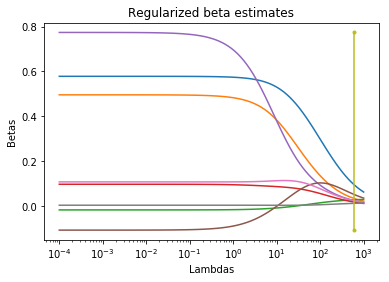

In [16]:
T = np.loadtxt(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module2\Exercises 2\Exercises 2\Python\Prostate.txt', delimiter = ' ', skiprows = 1, usecols=[1,2,3,4,5,6,7,8,9])

y = T[:, 8]
X = T[:,:8]

[n, p] = np.shape(X)

k = 100; # try k values of lambda
lambdas = np.logspace(-4, 3, k)

betas = np.zeros((p,k))
    
for i in range(k):
    betas[:, i] = ridgeMulti(X, lambdas[i], p, y)
    
plt.figure()
plt.semilogx(lambdas, betas.T )
plt.xlabel("Lambdas")
plt.ylabel("Betas")
plt.title("Regularized beta estimates")

#%% Exercise b
K = 10
N = len(X)

I = np.asarray([0] * N)
for i in range(N):
    I[i] = (i + 1) % K + 1
     
I = I[np.random.permutation(N)]
lambdas = np.logspace(-4, 3, k)
MSE = np.zeros((10, 100))

for i in range(1, K+1):
    XTrain = X[i != I, :]
    yTrain = y[i != I]
    Xtest = X[i == I, :]
    yTest = y[i == I]

    # centralize and normalize data
    XTrain = preprocessing.scale(XTrain)
    yTrain = preprocessing.scale(yTrain)

    for j in range(100):
        Beta = ridgeMulti(XTrain, lambdas[j], 8, yTrain)
        MSE[(i - 1), j] = np.mean((yTest - np.matmul(Xtest, Beta)) ** 2)
        
meanMSE = np.mean(MSE, axis = 0)
jOpt = np.argsort(meanMSE)[0]

lambda_OP = lambdas[jOpt]

# Remember excact solution depends on a random indexing, so results may vary
plt.semilogx([lambda_OP, lambda_OP], [np.min(betas), np.max(betas)], marker = ".")

#%% Exercise c
seMSE = np.std(MSE, axis = 0) / np.sqrt(K)

J = np.where(meanMSE[jOpt] + seMSE[jOpt] > meanMSE)[0]
j = int(J[-1:])
Lambda_CV_1StdRule = lambdas[j]

print("CV lambda 1 std rule %0.2f" % Lambda_CV_1StdRule)



1.0424173109610224
AIC at 1.51
BIC at 141.61
Lambda for the BIC is 613.59


Text(0.5,0,'lambda')

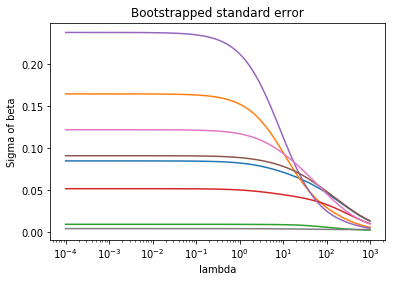

In [17]:
#%% Exercise 1 d
N = len(y)
[n, p] = np.shape(X)

off = np.ones(n)
M = np.c_[off, X] # Include offset / intercept

# Linear solver
beta, _, rnk, s = lng.lstsq(M, y)

yhat = np.matmul(M, beta)

e = y - np.matmul(X, Beta) # Low bias std
s = np.std(e)
print(s)
D = np.zeros(100)
AIC = np.zeros(100)
BIC = np.zeros(100)

for j in range(100):
    Beta = ridgeMulti(XTrain, lambdas[j], 8, yTrain)
    inner = np.linalg.inv(np.matmul(X.T, X) + lambdas[j] *np.eye(8))
    outer = np.matmul(np.matmul(X, inner), X.T)
    D[j] = np.trace(outer)
    e = y - np.matmul(X, Beta)
    err = np.sum(e ** 2) / N
    AIC[j] = err + 2 * D[j] / N * s ** 2
    BIC[j] = N / (s ** 2) * (err + np.log(N) * D[j] / N * s ** 2)
    
jAIC = np.min(AIC)
jBIC = np.min(BIC)



print("AIC at %0.2f" % jAIC)
print("BIC at %0.2f" % jBIC)
print("Lambda for the BIC is %0.2f" %lambdas[np.argmin(BIC)])

#%% Exercise 1e

NBoot = 100
[N, p] = np.shape(X)
Beta = np.zeros((p, len(lambdas), NBoot))

for i in range(NBoot):
    I = np.random.randint(0, N, N)
    XBoot = X[I, :]
    yBoot = y[I]
    for j in range(100):
        Beta[:, j, i] = ridgeMulti(XBoot, lambdas[j], p, yBoot)

stdBeta = np.std(Beta, axis = 2)
plt.figure()
for i in range(8):
    plt.semilogx(lambdas, stdBeta[i,:], label = i)
plt.title("Bootstrapped standard error")
plt.ylabel("Sigma of beta")
plt.xlabel("lambda")


In [325]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

path = "C:\\Users\\dnor\\Desktop\\02582\\Lecture2\\S2"

mat = scipy.io.loadmat(r'M:\Documents\Courses\Credits\2019August\Module2\Solutions 2\Solutions 2\Python\Silhouettes.mat')
Fem = mat['Fem'].ravel() - 1 # Get rid of outer dim, -1 due to stupid matlab indexing
Male = mat['Male'].ravel() - 1
Xa = mat['Xa']


#%% Exercise 2
fig, axis = plt.subplots(2, 2)
axis[0,0].plot(Xa[Fem,:65].T, Xa[Fem, 65:].T)
axis[0,0].set_title("Female Silhouettes")

axis[0,1].plot(Xa[Male, :65].T, Xa[Male, 65:].T)
axis[0,1].set_title("Male Silhouttes")

for i in range(2):
    axis[0,i].axis('equal')
    axis[0,i].axis([-0.25, 0.25, -0.25, 0.25])

N = np.shape(Xa)[0]
y = np.zeros(N)
y[Fem] = 1
n_classes = 2

MCrep = 10
K = 5

Error = np.zeros((K, 10))

I = np.asarray([0] * N)
for j in range(MCrep):
    for n in range(N):
        I[n] = (n + 1) % K + 1
        print(I)
    I = I[np.random.permutation(N)]
    for i in range(1, K+1):
        X_train = Xa[i != I, :]
        y_train = y[i != I]
        X_test = Xa[i == I, :]
        y_test = y[i == I]
        '''
        Can also make test training split as;
        X_train, X_test, y_train, y_test = train_test_split(...
                Xa, y, test_size=0.33, random_state=42)
        '''
        for k in range(1,11):
            # Use Scikit KNN classifier, as you have already tried implementing it youself
            neigh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
            neigh.fit(X_train, y_train)
            yhat = neigh.predict(X_test)
            
            Error[i-1, k-1] = sum(np.abs(y_test - yhat)) / len(yhat)

E = np.mean(Error, axis = 0)
axis[1,0].scatter(list(range(1,11)), E, marker = '*')
axis[1,0].axis([0, 11, 0.2, 0.6])
axis[1,0].set_title("CV test error")
axis[1,0].set_xlabel("K")
axis[1,0].set_ylabel("Error")

# ROC curve
# Compute ROC curve and ROC area for each class, here based on last cross-validation fold

fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = neigh.predict_proba(X_test) # find probabilities for a specific fold case

# Make y 1-hot encoded
y_1hot = np.zeros((8, n_classes))
y_1hot[np.arange(8), y_test.astype(int)] = 1    
for i in range(n_classes): # A bit redundant here, as there only is 2 classes
    fpr[i], tpr[i], threshold = roc_curve(y_1hot[:, i], y_score[:, i])
    print (threshold)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area, class 1 (females)
lw = 2
axis[1,1].plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
axis[1,1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axis[1,1].set_xlim([0.0, 1.0])
axis[1,1].set_ylim([0.0, 1.05])
axis[1,1].set_xlabel('False Positive Rate')
axis[1,1].set_ylabel('True Positive Rate')
axis[1,1].set_title('ROC')
axis[1,1].legend(loc="upper left")

#%% Exercise 3
# use the same data as above from the last cv loop
 
def roc_data(y_hat, y_true, cut):
    
    sensitivity = np.zeros(len(cut))
    specificity = np.zeros(len(cut))
    for index, threshold in enumerate(cut):
        num_positive = np.sum(y_true == 1)
        num_negative = np.sum(y_true == 0)
        true_positive = np.sum(y_hat[y_true==1] >= threshold)
        true_negative = np.sum(y_hat[y_true==0]  < threshold)
        
        sensitivity[index] = true_positive / num_positive
        specificity[index] = true_negative / num_negative
    
    return sensitivity, specificity

fpr = dict()
tpr = dict()
roc_auc = dict()
cutoff = np.linspace(1.0, 0.0, 10)
for i in range(n_classes): # A bit redundant here, as there only is 2 classes
    tpr[i], specificity = roc_data(y_score[:, i], y_1hot[:, i], cutoff)
    # FPR is 1 - TNR(specificity)
    fpr[i] = 1 - specificity
    roc_auc[i] = auc(fpr[i], tpr[i])



plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="upper left")

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 5 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 5 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[2 3 4 5 1 2 3 4 5 1 2 3 4 0

[2 3 2 1 2 5 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 2 1 2 5 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 1 2 5 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 2 5 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 5 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 4 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 5 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 2 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 5 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 5 1 3 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 5 1 2 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 5 1 2 3 5 3 5 5 1 4 4 2 4 3 1 4 2 3 5 1 4 1 1 5 2 4 2 4 2
 3 5]
[2 3 4 5 1 2 3 4 5 1 2 3 4 3

[2 5 1 4 2 4 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 1 4 2 4 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 4 2 4 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 2 4 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 4 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 2 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 5 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 2 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 1 3 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 2 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 3 1 5 4 2 4 5 5 3 3 3 2 4 4 2 3 5 1 1 1 1 4 3 5 4 2
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 3 4 5

[2 2 1 4 4 1 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 1 4 4 1 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 4 4 1 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 4 1 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 1 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 5 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 4 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 5 5 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 5 1 4 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 2 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 3 5 5 5 1 4 3 2 3 2 5 5 3 1 2 4 2 3 3 2 2 4 1 4 1 3
 1 3]
[2 3 4 5 1 2 3 4 5 1 2 3 4 5

In [328]:
for n in range(50):
    I[n] = (n + 1) % K + 1

IndexError: index 39 is out of bounds for axis 0 with size 39